In [44]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# Function to classify a single pixel based on RGB thresholds
def classify_pixel(r, g, b):
    if b > r and b > g:  # Predominantly blue
        return "Highest_moisture"
    elif g > r and g > b:  # Predominantly green
        return "Highest_moisture"
    elif r > g and r > b:  # Predominantly red
        return "Dry"
    elif r > b and g > b:  # Mix of red and green (orange/yellow)
        return "Moderate_moisture"
    else:  # Default
        return "Moderate_moisture"

In [46]:
# Function to classify an image based on majority pixel class
def classify_image(image):
    classes = {"Highest_moisture": 0, "Moderate_moisture": 0, "Dry": 0}
    for row in image:
        print(row)
        for pixel in row:
            r, g, b = pixel
            class_label = classify_pixel(r, g, b)
            classes[class_label] += 1
    # Return the majority class
    return max(classes, key=classes.get)

In [47]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    f"../data/Soil_classification_dataset_preprocessed",
    image_size=(96, 96),
    color_mode='rgb',
    batch_size=1,
)
classes = dict(enumerate(data.class_names))
reverse_classes = {v: k for k, v in classes.items()}
images = data.as_numpy_iterator()

Found 15002 files belonging to 3 classes.


In [ ]:
# Classify images using the RGB classifier
labels = []
predictions = []
for image in images:
    X, y_true = image
    labels.extend(y_true)
    predictions.append(classify_image(X[0]))
predictions = map(lambda x: reverse_classes[x], predictions)


In [40]:
labels = map(lambda x: classes[x], labels)
reverse_classes = {v: k for k, v in classes.items()}
predictions = map(lambda x: reverse_classes[x], predictions)
labels = map(lambda x: reverse_classes[x], labels)

In [43]:
[*labels]

KeyError: 'Moderate_moisture'

In [41]:
# Evaluate the model
accuracy = accuracy_score(labels, predictions)
report = classification_report(labels, predictions)
conf_matrix = confusion_matrix(labels, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

InvalidParameterError: The 'y_true' parameter of accuracy_score must be an array-like or a sparse matrix. Got <map object at 0x0000027050E90D90> instead.

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Function to classify a single pixel based on RGB thresholds
def classify_pixel(r, g, b):
    if b > r and b > g:  # Predominantly blue
        if b > 200:  # Light blue
            return "Moderate_moisture"
        else:  # Dark blue
            return "Highest_moisture"
    elif g > r and g > b:  # Predominantly green
        return "Moderate_moisture"
    elif r > g and r > b:  # Predominantly red
        return "Dry"
    elif r > b and g > b:  # Mix of red and green (orange/yellow)
        if r > 200 and g > 200:  # Yellow
            return "Moderate_moisture"
        else:  # Orangish red
            return "Dry"
    else:  # Default
        return "Moderate_moisture"

In [35]:
# Function to classify an image based on majority pixel class
def classify_image(image):
    classes = {"Highest_moisture": 0, "Moderate_moisture": 0, "Dry": 0}
    for row in image:
        for pixel in row:
            r, g, b = pixel
            class_label = classify_pixel(r, g, b)
            classes[class_label] += 1
    # Return the majority class
    return max(classes, key=classes.get)

In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    f"../data/Soil_classification_dataset_preprocessed",
    image_size=(96, 96),
    color_mode='rgb',
    batch_size=1,
)
classes = dict(enumerate(data.class_names))
reverse_classes = {v: k for k, v in classes.items()}
images = data.as_numpy_iterator()

Found 15002 files belonging to 3 classes.


In [37]:
# Classify images using the RGB classifier
labels = []
predictions = []
for image in images:
    X, y_true = image
    labels.extend(y_true)
    predictions.append(classify_image(X[0]))
predictions = list(map(lambda x: reverse_classes[x], predictions))


In [38]:
mispredictions = 0
instances = len(labels)
if instances == len(predictions):
    for i in range(instances):
        mispredictions += int(labels[i] != predictions[i])

In [39]:
mispredictions/instances

0.03972803626183176

In [40]:
# Evaluate the model
accuracy = accuracy_score(labels, predictions)
report = classification_report(labels, predictions, zero_division=0)
conf_matrix = confusion_matrix(labels, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9602719637381683
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5001
           1       0.92      1.00      0.96      5000
           2       1.00      0.88      0.94      5001

    accuracy                           0.96     15002
   macro avg       0.96      0.96      0.96     15002
weighted avg       0.96      0.96      0.96     15002

Confusion Matrix:
 [[5001    0    0]
 [  13 4987    0]
 [ 170  413 4418]]


<Figure size 640x480 with 0 Axes>

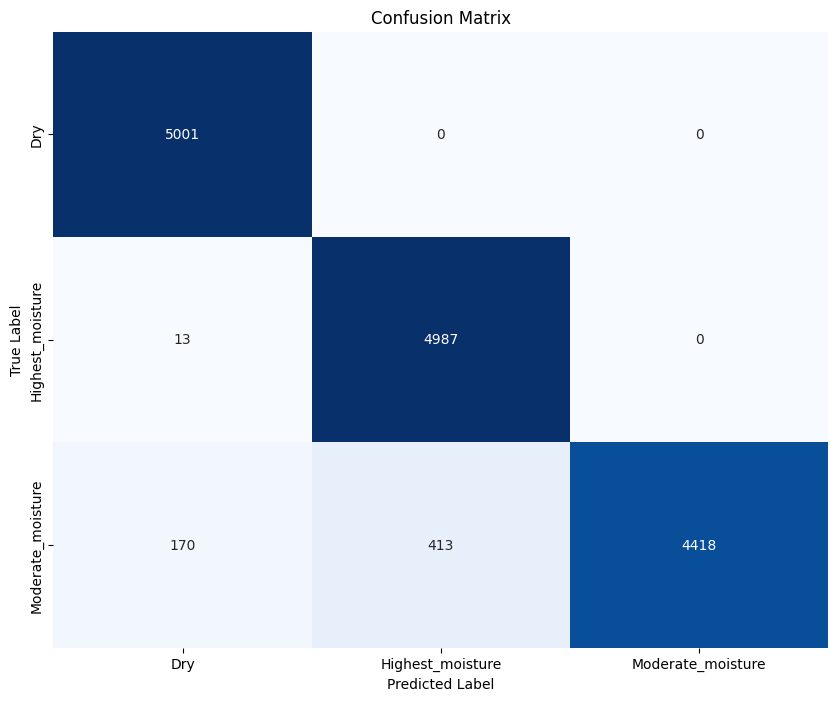

In [44]:
plt.clf()
fig = plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=reverse_classes.keys(), yticklabels=reverse_classes.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
fig.savefig(f'../results/simple_rgb_classifier_confusion_matrix.png')